# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

C:\Users\uali\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key = api_keys.api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


city_data = []

print("Begining of Data Retrieval")
print("--------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    city_url = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    record_count += 1
    
    try:
        city_weather =  requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. skipping... ")
        pass

print("--------------------------")
print("Data Retrieval Complete   ")
print("--------------------------")


Begining of Data Retrieval
--------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | srednekolymsk
Processing Record 3 of Set 1 | turukhansk
Processing Record 4 of Set 1 | norilsk
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | michigan city
Processing Record 7 of Set 1 | san cristobal
Processing Record 8 of Set 1 | havelock
Processing Record 9 of Set 1 | wulanhaote
City not found. skipping... 
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | terrace
Processing Record 12 of Set 1 | sinnamary
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | flinders
Processing Record 15 of Set 1 | borogontsy
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | ouallam
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 1 | bonnyville
Proces

City not found. skipping... 
Processing Record 36 of Set 4 | manono
Processing Record 37 of Set 4 | kodinsk
Processing Record 38 of Set 4 | vardo
Processing Record 39 of Set 4 | sioux lookout
Processing Record 40 of Set 4 | cayenne
Processing Record 41 of Set 4 | viedma
Processing Record 42 of Set 4 | nemuro
Processing Record 43 of Set 4 | ahipara
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | kastamonu
Processing Record 46 of Set 4 | lakhtar
Processing Record 47 of Set 4 | mongar
Processing Record 48 of Set 4 | moerai
Processing Record 49 of Set 4 | bud
Processing Record 0 of Set 5 | gravdal
Processing Record 1 of Set 5 | palmer
Processing Record 2 of Set 5 | diebougou
Processing Record 3 of Set 5 | mangrol
Processing Record 4 of Set 5 | itarema
Processing Record 5 of Set 5 | yerbogachen
Processing Record 6 of Set 5 | belawan
Processing Record 7 of Set 5 | grand river south east
City not found. skipping... 
Processing Record 8 of Set 5 | batagay-alyta
P

Processing Record 21 of Set 8 | mehamn
Processing Record 22 of Set 8 | umzimvubu
City not found. skipping... 
Processing Record 23 of Set 8 | sao paulo de olivenca
Processing Record 24 of Set 8 | mackay
Processing Record 25 of Set 8 | paamiut
Processing Record 26 of Set 8 | naze
Processing Record 27 of Set 8 | loukhi
Processing Record 28 of Set 8 | nadym
Processing Record 29 of Set 8 | zhigansk
Processing Record 30 of Set 8 | lagoa
Processing Record 31 of Set 8 | burns lake
Processing Record 32 of Set 8 | saint anthony
Processing Record 33 of Set 8 | quanzhou
Processing Record 34 of Set 8 | faanui
Processing Record 35 of Set 8 | aden
Processing Record 36 of Set 8 | seoul
Processing Record 37 of Set 8 | ngukurr
City not found. skipping... 
Processing Record 38 of Set 8 | tolaga bay
Processing Record 39 of Set 8 | carballo
Processing Record 40 of Set 8 | ancud
Processing Record 41 of Set 8 | domoni
City not found. skipping... 
Processing Record 42 of Set 8 | glendale
Processing Record 43

Processing Record 6 of Set 12 | catalina
Processing Record 7 of Set 12 | mecca
Processing Record 8 of Set 12 | wasilla
Processing Record 9 of Set 12 | strezhevoy
Processing Record 10 of Set 12 | shenjiamen
Processing Record 11 of Set 12 | ichinohe
Processing Record 12 of Set 12 | sao joao da barra
Processing Record 13 of Set 12 | bonavista
Processing Record 14 of Set 12 | waharoa
Processing Record 15 of Set 12 | nome
Processing Record 16 of Set 12 | harper
Processing Record 17 of Set 12 | krasnoselkup
City not found. skipping... 
Processing Record 18 of Set 12 | santa rosa
Processing Record 19 of Set 12 | zelenoborsk
Processing Record 20 of Set 12 | hualmay
Processing Record 21 of Set 12 | zakupne
Processing Record 22 of Set 12 | wilmington
Processing Record 23 of Set 12 | tautira
Processing Record 24 of Set 12 | tessalit
Processing Record 25 of Set 12 | kupang
Processing Record 26 of Set 12 | tateyama
Processing Record 27 of Set 12 | vanimo
Processing Record 28 of Set 12 | chicama
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame(city_data)
city_data
lats = city_df["Lat"]
max_temps =city_df["Max Temp"]
humidity =city_df["Humidity"]
cloudiness =city_df["Cloudiness"]
wind_speed =city_df["Wind Speed"] 

city_df.to_csv(output_data_file, index_label= "City_ID")

city_df.count()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64

In [5]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,40,AR,1547758800,54,-54.81,-68.31,53.60,35.57
1,srednekolymsk,64,RU,1547762661,53,67.46,153.71,-31.13,2.93
2,turukhansk,92,RU,1547762661,81,65.80,87.96,6.18,23.29
3,norilsk,88,RU,1547762661,81,69.35,88.20,3.57,25.86
4,mataura,80,NZ,1547762661,98,-46.19,168.86,54.78,4.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

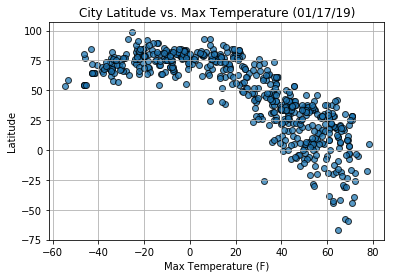

In [21]:
plt.scatter(lats, max_temps, edgecolor= "black", linewidths= 1, marker= "o", alpha= 0.75, label= "Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)

plt.savefig("Fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

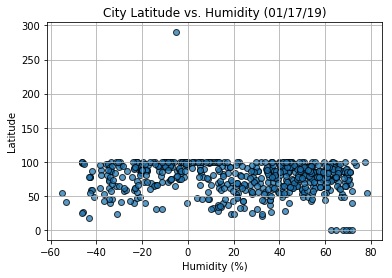

In [20]:
plt.scatter(lats,
            humidity,
            edgecolor= "black", 
            linewidths= 1, marker= "o",
            alpha= 0.75, label= "Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid(True)

plt.savefig("Fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

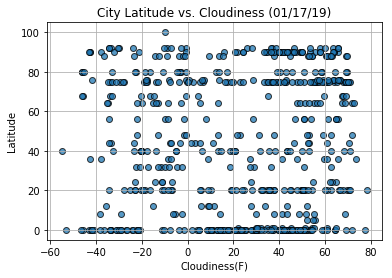

In [19]:
plt.scatter(lats,
            cloudiness,
            edgecolor= "black", 
            linewidths= 1, marker= "o",
            alpha= 0.75, label= "Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Cloudiness(F)")
plt.ylabel("Latitude")
plt.grid(True)

plt.savefig("Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

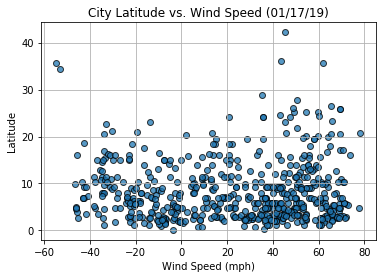

In [22]:
plt.scatter(lats,
            wind_speed,
            edgecolor= "black", 
            linewidths= 1, marker= "o",
            alpha= 0.75, label= "Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid(True)

plt.savefig("Fig4.png")
plt.show()